In [30]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import plotly.graph_objects as go
import joblib
import time
from sklearn.metrics import recall_score, make_scorer, mean_absolute_percentage_error ,f1_score, ConfusionMatrixDisplay ,mean_absolute_error, r2_score, mean_squared_error
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_validate
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import graphviz
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit, RandomizedSearchCV ,cross_val_predict ,GridSearchCV ,learning_curve
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
cars_sales_Model = joblib.load('./Assisting/')

## prophet

In [7]:
cars_sales_Model = cars_sales_Model.rename(columns={'Date': 'ds', 'Price ($)': 'y'})

In [ ]:
model_prophet = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
print('start fitting prophet model....') 

model_prophet.fit(cars_sales_Model)


print('prophet model fitted done')

start fitting prophet model....


16:50:02 - cmdstanpy - INFO - Chain [1] start processing
16:50:15 - cmdstanpy - INFO - Chain [1] done processing


prophet model fitted done


In [9]:
future_prophet = model_prophet.make_future_dataframe(periods=30)  # forecast next 30 days
print('start forecasting prophet model....')
forecast_prophet = model_prophet.predict(future_prophet)
print('prophet model forecast done')

forecast_prophet.tail()

start forecasting prophet model....
prophet model forecast done


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
637,2024-01-26,-0.132344,-1.313058,1.276571,-0.132376,-0.132303,0.080501,0.080501,0.080501,0.125083,...,0.014079,0.014079,0.014079,-0.058661,-0.058661,-0.058661,0.0,0.0,0.0,-0.051843
638,2024-01-27,-0.132333,-1.281198,1.174480,-0.132367,-0.132289,0.055683,0.055683,0.055683,0.125083,...,-0.016991,-0.016991,-0.016991,-0.052409,-0.052409,-0.052409,0.0,0.0,0.0,-0.076650
639,2024-01-28,-0.132322,-1.331034,1.252996,-0.132359,-0.132275,0.074567,0.074567,0.074567,0.125083,...,-0.004677,-0.004677,-0.004677,-0.045839,-0.045839,-0.045839,0.0,0.0,0.0,-0.057754
640,2024-01-29,-0.132310,-1.317861,1.297329,-0.132350,-0.132259,0.090176,0.090176,0.090176,0.125083,...,0.004186,0.004186,0.004186,-0.039093,-0.039093,-0.039093,0.0,0.0,0.0,-0.042134
641,2024-01-30,-0.132299,-1.385212,1.220937,-0.132341,-0.132245,0.067456,0.067456,0.067456,0.125083,...,-0.025310,-0.025310,-0.025310,-0.032317,-0.032317,-0.032317,0.0,0.0,0.0,-0.064843


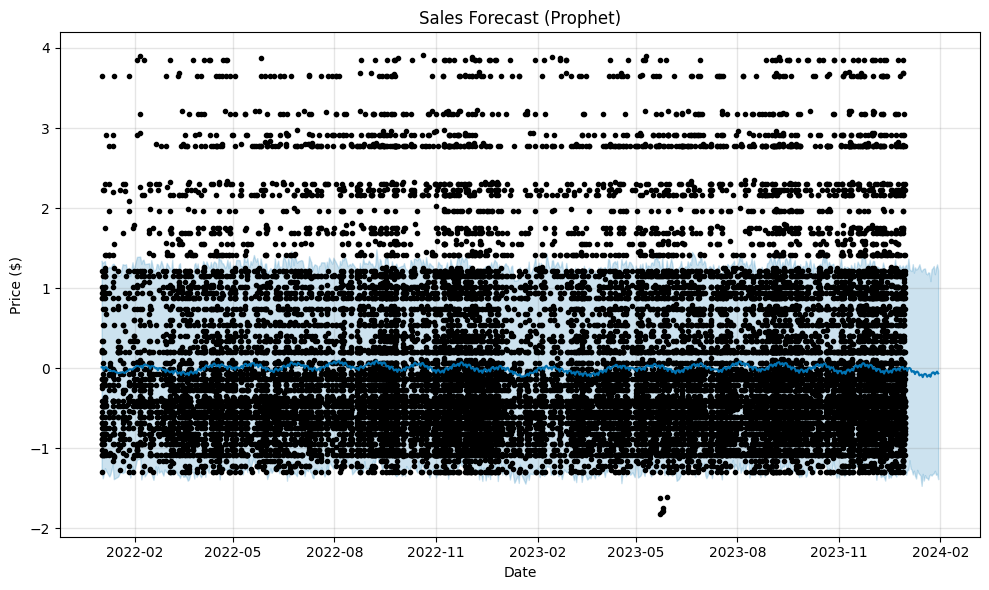

In [10]:
fig = model_prophet.plot(forecast_prophet)
plt.title('Sales Forecast (Prophet)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()
fig.savefig('./Images/prophet.png')

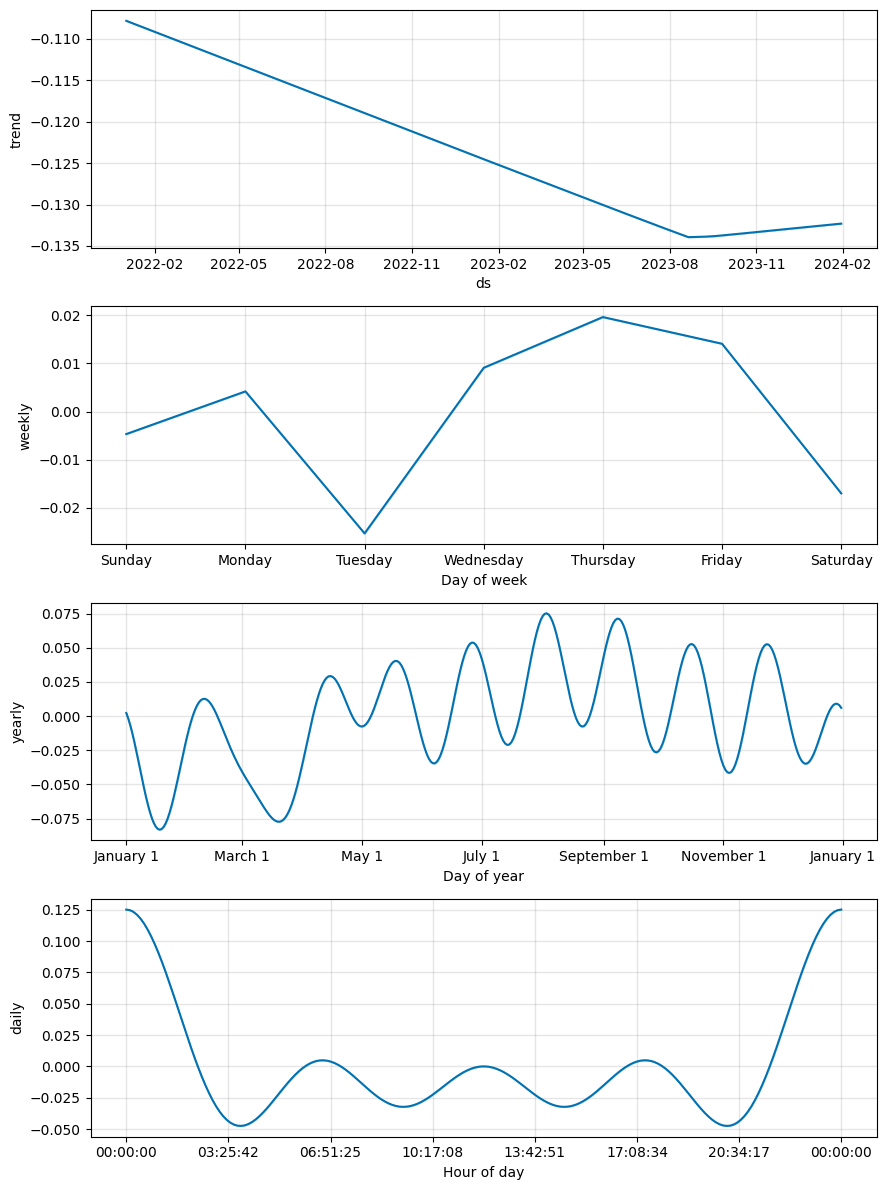

In [11]:
fig2 = model_prophet.plot_components(forecast_prophet)
plt.savefig( './Images/prophet_components.png')
plt.show()

In [12]:
train_p, test_p = train_test_split(cars_sales_Model, test_size=0.2, shuffle=False)

print(f"Train shape: {train_p.shape}")
print(f"Test shape: {test_p.shape}")
print(f"Train date range: {train_p['ds'].min()} to {train_p['ds'].max()}")
print(f"Test date range: {test_p['ds'].min()} to {test_p['ds'].max()}")

Train shape: (18471, 28)
Test shape: (4618, 28)
Train date range: 2022-01-02 00:00:00 to 2023-10-01 00:00:00
Test date range: 2023-10-01 00:00:00 to 2023-12-31 00:00:00


In [13]:
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
print('start fitting the train prophet model....')
model.fit(train_p)
print('train prophet model fitted done')

start fitting the train prophet model....


16:56:30 - cmdstanpy - INFO - Chain [1] start processing
16:56:33 - cmdstanpy - INFO - Chain [1] done processing


train prophet model fitted done


In [14]:
future_p_train = pd.concat([train_p[['ds']], test_p[['ds']]]).drop_duplicates().sort_values('ds')
forecast_p_train = model_prophet.predict(future_prophet)
forecast_test_p = forecast_p_train[forecast_p_train['ds'].isin(test_p['ds'])]
y_true_p = test_p['y'].values
y_pred_p = forecast_test_p['yhat'].values

In [15]:
if len(y_true_p) != len(y_pred_p):
    y_true_p = y_true_p[-len(y_pred_p):]
    print("Adjusted y_true shape:", y_true_p.shape)
y_true_subset = y_true_p[-85:]  
    

Adjusted y_true shape: (85,)


In [16]:
rmse = np.sqrt(mean_squared_error(y_true_subset, y_pred_p))
mae = mean_absolute_error(y_true_subset, y_pred_p)
r2 = 1 - sum((y_true_subset - y_pred_p)**2) / sum((y_true_subset - np.mean(y_true_subset))**2)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

RMSE: 0.987236993767962
MAE: 0.7748008986822177
R2: -0.005605178500896368


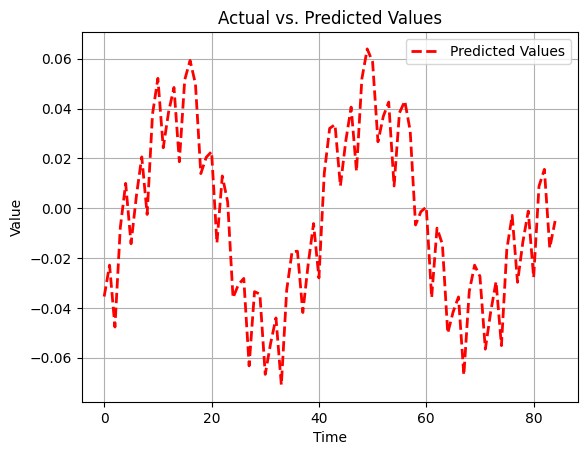

In [17]:
plt.plot(y_pred_p, label="Predicted Values", color='red', linestyle='--', linewidth=2)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

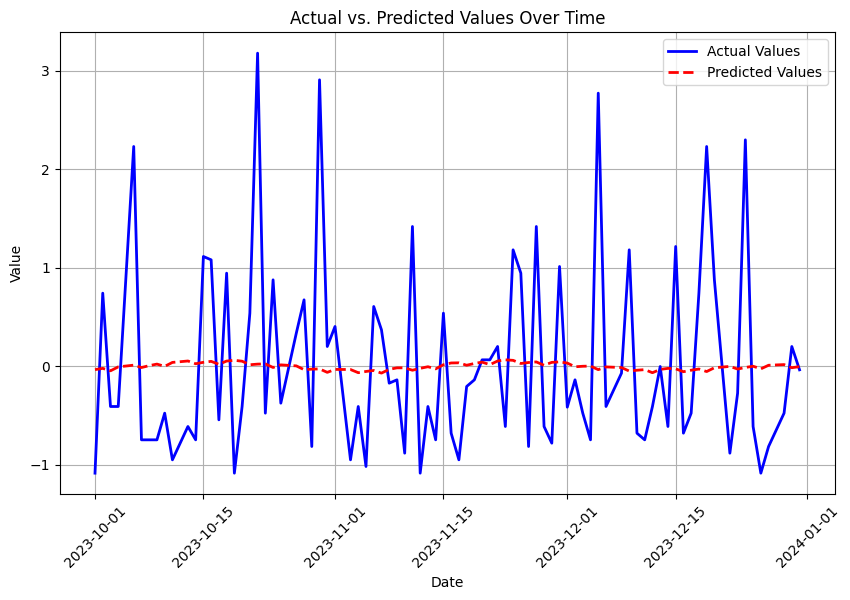

In [18]:

plt.figure(figsize=(10, 6))

plt.plot(forecast_test_p['ds'][-85:], y_true_subset, label="Actual Values", color='blue', linewidth=2)
plt.plot(forecast_test_p['ds'][-85:], y_pred_p, label="Predicted Values", color='red', linestyle='--', linewidth=2)
plt.title("Actual vs. Predicted Values Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


## ARIMA


In [19]:
cars_sales_Model = cars_sales_Model.sort_values('ds')
train_a, test_a = train_test_split(cars_sales_Model, test_size=0.2, shuffle=False)

print(f"Train shape: {train_a.shape}")
print(f"Test shape: {test_a.shape}")
print(f"Train date range: {train_a['ds'].min()} to {train_a['ds'].max()}")
print(f"Test date range: {test_a['ds'].min()} to {test_a['ds'].max()}")

Train shape: (18471, 28)
Test shape: (4618, 28)
Train date range: 2022-01-02 00:00:00 to 2023-10-01 00:00:00
Test date range: 2023-10-01 00:00:00 to 2023-12-31 00:00:00


In [20]:
train_idx = train_a.set_index('ds')
test_idx  = test_a.set_index('ds')


In [21]:
model_Arima = ARIMA(train_idx['y'], order=(5, 1, 0))   # tweak (p,d,q) as needed
model_fit_Arima = model_Arima.fit()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [22]:
fc_A = model_fit_Arima.forecast(steps=len(test_idx))
forecast_df_A = pd.DataFrame({'predicted_mean': fc_A}, index=test_idx.index)

forecast_df_A['predicted_mean'] = (
    forecast_df_A['predicted_mean']
      .fillna(method='ffill')
      .fillna(method='bfill')
)

y_true_A = test_idx['y'].values
y_pred_A = forecast_df_A['predicted_mean'].values


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\AppData\Local\Temp\ipykernel_16820\4180718312.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forecast_df_A['predicted_mean']


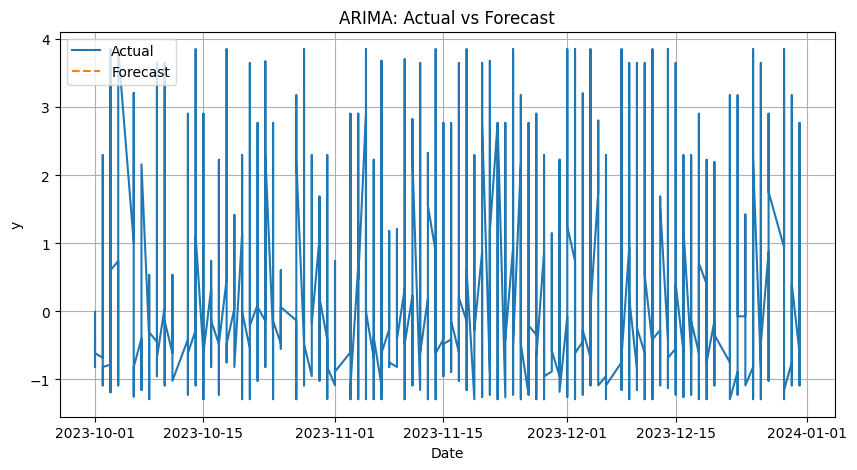

In [23]:
plt.figure(figsize=(10,5))
plt.plot(test_idx.index, test_idx['y'],      label='Actual')
plt.plot(forecast_df_A.index, y_pred_A, linestyle='--', label='Forecast')
plt.title('ARIMA: Actual vs Forecast')
plt.xlabel('Date'); plt.ylabel('y')
plt.legend(); plt.grid(True)
plt.show()

In [27]:

forecast_test_Arima  = model_fit_Arima.forecast(steps=len(test_a))
forecast_test_Arima = pd.DataFrame(forecast_test_Arima, columns=['predicted_mean'], index=test_a.index)
forecast_test_Arima['predicted_mean'].fillna(method='ffill', inplace=True)  # Forward fill the missing values


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\AppData\Local\Temp\ipykernel_16820\2230306598.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

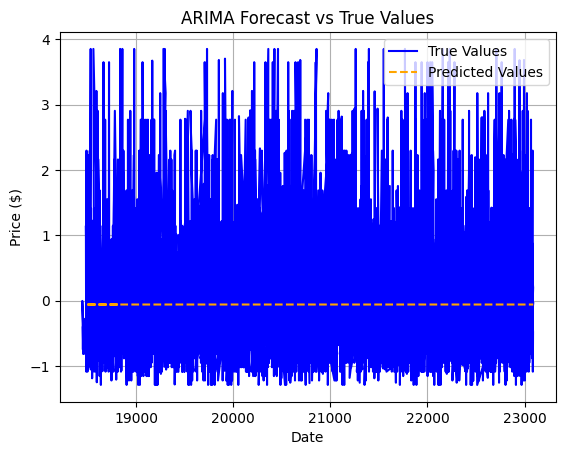

In [28]:
plt.plot(test_a.index, test_a['y'], label='True Values', color='blue')

# Plot predicted values from the ARIMA forecast
plt.plot(forecast_test_Arima.index, forecast_test_Arima['predicted_mean'], label='Predicted Values', linestyle='--', color='orange')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('ARIMA Forecast vs True Values')
plt.legend()
plt.grid(True)
plt.show()

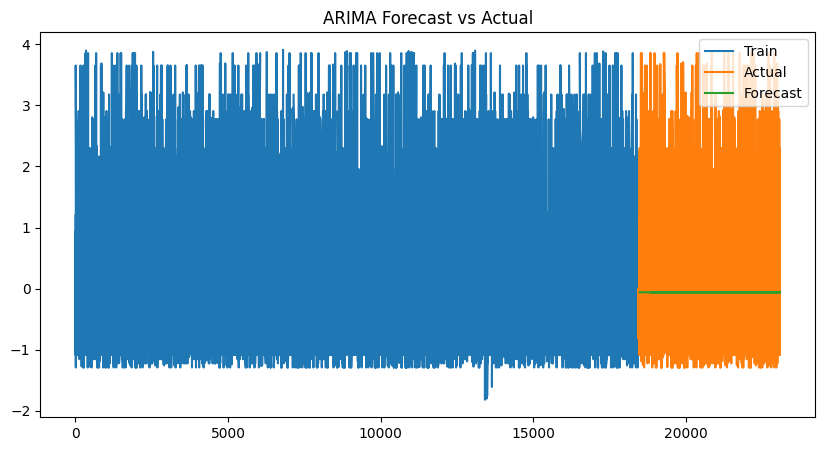

In [29]:
plt.figure(figsize=(10,5))
plt.plot(train_a.index, train_a['y'], label='Train')
plt.plot(test_a.index, test_a['y'], label='Actual')
plt.plot(test_a.index, forecast_test_Arima, label='Forecast')
plt.legend()
plt.title('ARIMA Forecast vs Actual')
plt.show()

## XGboost with prophet


In [45]:
df = joblib.load('./Assisting/dataPreprocessing.pkl')
df['Price_to_Income'] = df['Price ($)'] / df['Annual Income']
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Price_Lag1'] = df['Price ($)'].shift(1)
df['Price_Lag2'] = df['Price ($)'].shift(2)
df['Rolling_Mean_7'] = df['Price ($)'].rolling(window=7).mean()
df['Rolling_Std_7'] = df['Price ($)'].rolling(window=7).std()
df.fillna(method='bfill', inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_16820\172283685.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [46]:
X = df.drop(['Price ($)', 'Date'], axis=1)
y = df['Price ($)']
X = pd.get_dummies(X, drop_first=True)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)  # For cross-validation

In [48]:
xgb = XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=7,
    n_estimators=300,
    subsample=0.8,
    random_state=42
)


In [49]:
print('start fitting the train xgboost model and predicting testing....')
xgb.fit(X_train_scaled, y_train)
predictions = xgb.predict(X_test_scaled)
print('xgboost model fitted and prediction done')

start fitting the train xgboost model and predicting testing....
xgboost model fitted and prediction done


In [50]:

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print(f"XGBoost MAE (Test Set): {mae:.6f}")
print(f"XGBoost MAE (Train Set): {mean_absolute_error(y_train, xgb.predict(X_train_scaled)):.6f}")
print(f"XGBoost RMSE (Test Set): {rmse:.6f}")
print(f"XGBoost RMSE (Train Set): {np.sqrt(mean_squared_error(y_train, xgb.predict(X_train_scaled))):.6f}")
print(f"XGBoost R² (Test Set): {r2:.6f}")
print(f"XGBoost R2 (Train Set): {r2_score(y_train, xgb.predict(X_train_scaled)):.6f}")


XGBoost MAE (Test Set): 0.091634
XGBoost MAE (Train Set): 0.038936
XGBoost RMSE (Test Set): 0.143472
XGBoost RMSE (Train Set): 0.053856
XGBoost R² (Test Set): 0.979436
XGBoost R2 (Train Set): 0.997099


In [51]:
tscv = TimeSeriesSplit(n_splits=5)
cv_scores = cross_val_score(xgb, X_scaled, y, cv=tscv, scoring='neg_mean_absolute_error')
cv_mae = -cv_scores.mean()
print(f"TimeSeriesSplit CV MAE: {cv_mae:.6f}")
print(f"Cross-Validation MAE: {cv_mae:.6f}")
print(f"Cross-Validation RMSE: {np.sqrt(-cv_scores.mean()):.6f}")
print(f"Cross-Validation R2: {cv_scores.mean():.6f}")

TimeSeriesSplit CV MAE: 0.117375
Cross-Validation MAE: 0.117375
Cross-Validation RMSE: 0.342601
Cross-Validation R2: -0.117375


In [52]:
# Walk-forward validation
mae_scores, rmse_scores = [], []
for train_idx, test_idx in tscv.split(X_scaled):
    X_tr, X_te = X_scaled[train_idx], X_scaled[test_idx]
    y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]
    xgb.fit(X_tr, y_tr)
    preds = xgb.predict(X_te)
    mae_scores.append(mean_absolute_error(y_te, preds))
    rmse_scores.append(np.sqrt(mean_squared_error(y_te, preds)))
print(f"Walk-Forward MAE: {np.mean(mae_scores):.6f}")
print(f"Walk-Forward RMSE: {np.mean(rmse_scores):.6f}")
print(f"Walk-Forward R2: {r2_score(y, xgb.predict(X)):.6f}")

Walk-Forward MAE: 0.117375
Walk-Forward RMSE: 0.185324
Walk-Forward R2: -0.939034


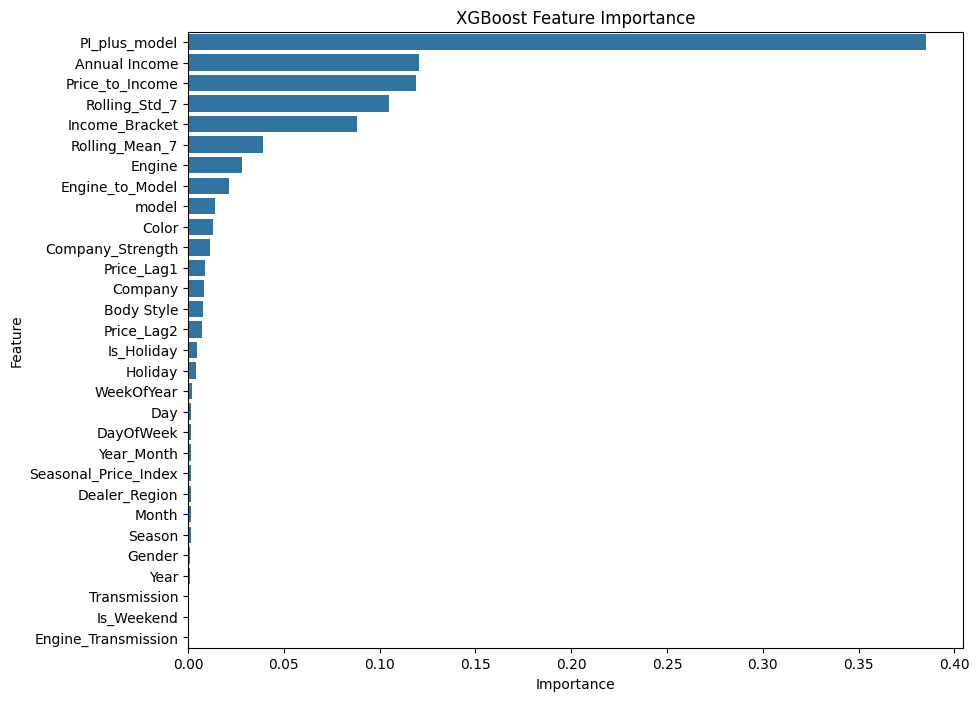

In [53]:
# Feature importance plot
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': xgb.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('XGBoost Feature Importance')
plt.savefig('./Images/feature_importance.png')
plt.show()

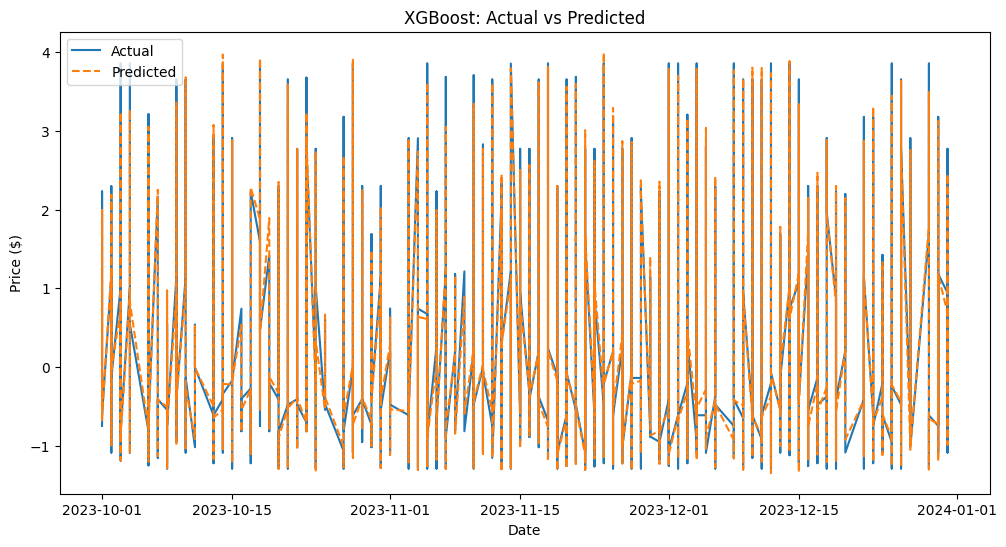

In [54]:


# Actual vs Predicted plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].iloc[-len(y_test):], y_test, label='Actual')
plt.plot(df['Date'].iloc[-len(y_test):], predictions, label='Predicted', linestyle='--')
plt.title('XGBoost: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.savefig('./Images/actual_vs_predicted.png')
plt.show()

In [55]:
# Ensemble with Holt-Winters
hw = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=12).fit()
hw_forecast = hw.forecast(len(y_test))
ensemble_predictions = (predictions + hw_forecast) / 2
ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_predictions))
print(f"Ensemble MAE: {ensemble_mae:.6f}")
print(f"Ensemble RMSE: {ensemble_rmse:.6f}")

Ensemble MAE: 18.073847
Ensemble RMSE: 18.835840


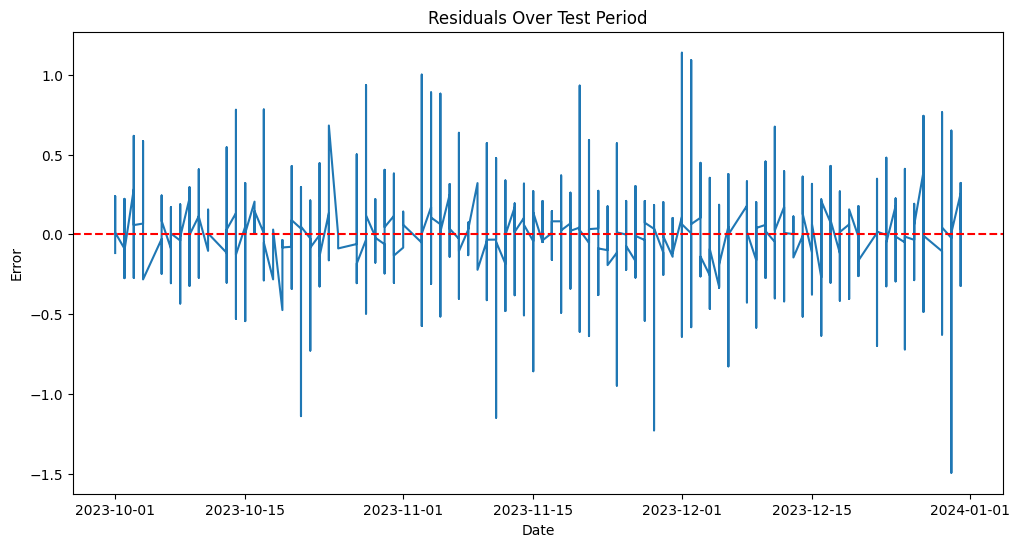

In [56]:
residuals = y_test - predictions
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].iloc[-len(y_test):], residuals)
plt.title('Residuals Over Test Period')
plt.xlabel('Date')
plt.ylabel('Error')
plt.axhline(0, color='red', linestyle='--')
plt.savefig('./Images/residuals.png')
plt.show()


In [57]:

# Hyperparameter tuning
param_dist = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 1.0]
}
random_search = RandomizedSearchCV(
    xgb, param_distributions=param_dist, n_iter=20,
    cv=TimeSeriesSplit(n_splits=5), scoring='neg_mean_absolute_error', random_state=42
)
random_search.fit(X_train_scaled, y_train)
print("Best parameters:", random_search.best_params_)

Best parameters: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


XGBoost MAE (Test Set): 0.0905
XGBoost RMSE (Test Set): 0.1398
XGBoost R2 (Test Set): 0.9805
Cross-Validation MAE: 0.0919
Walk-Forward MAE: 0.1182
Walk-Forward RMSE: 0.1874


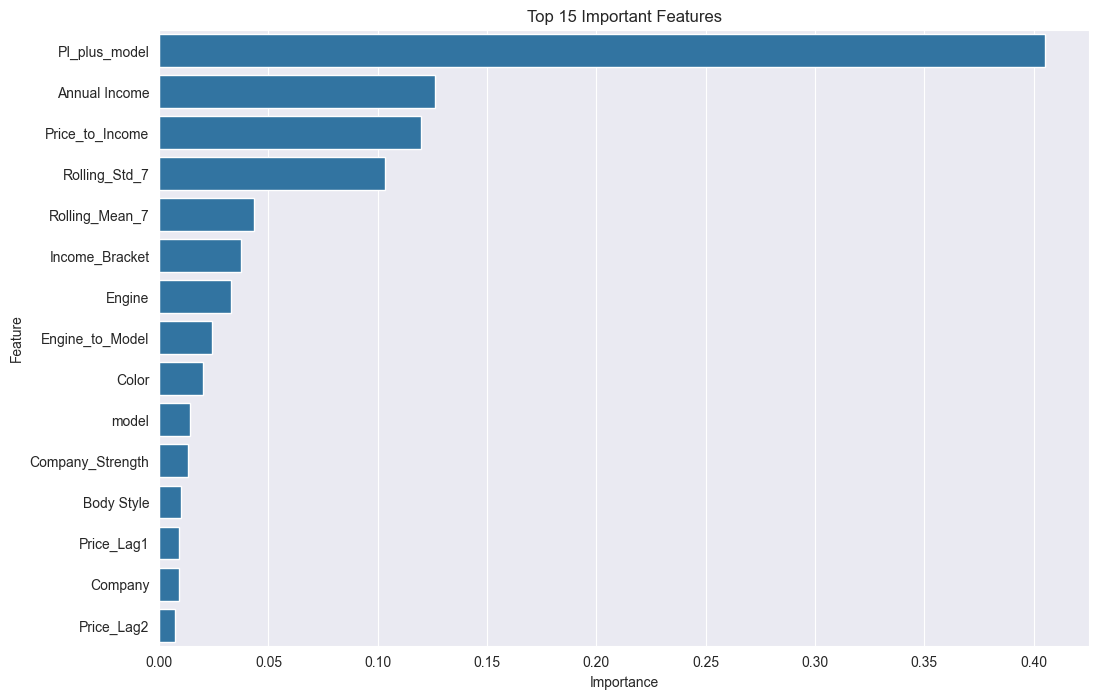

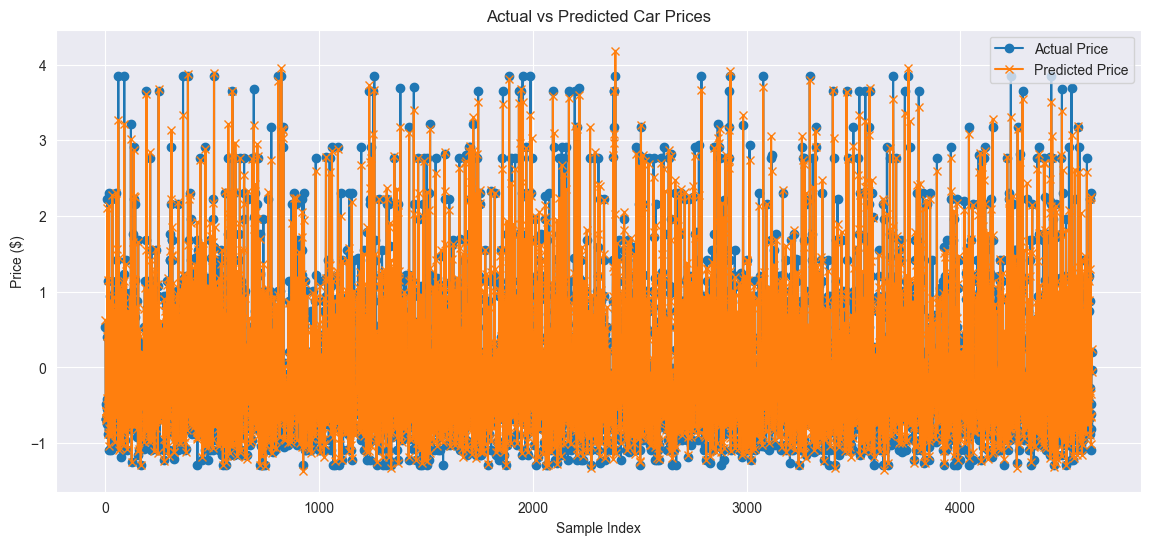

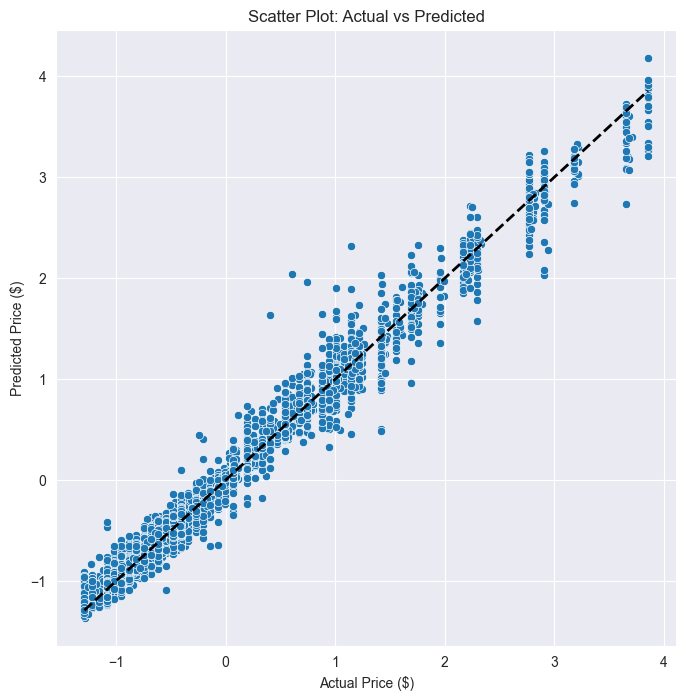

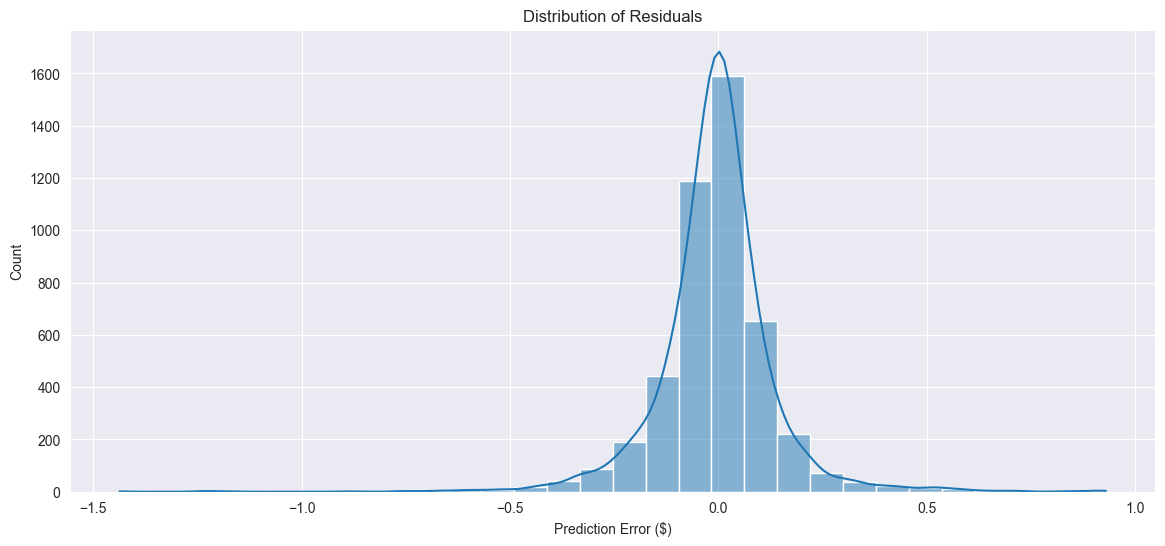

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Ensemble MAE: 0.3772
Ensemble RMSE: 0.5185


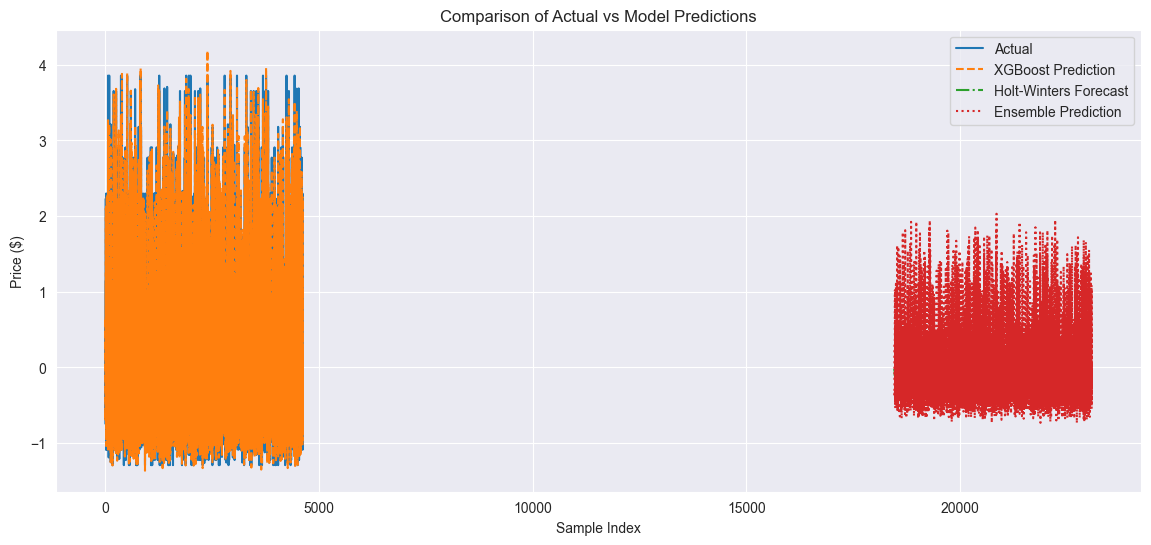

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters Found: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Basic settings
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
df = joblib.load('./Assisting/dataPreprocessing.pkl')

# Feature engineering
df['Price_to_Income'] = df['Price ($)'] / df['Annual Income']
df['Price_Lag1'] = df['Price ($)'].shift(1)
df['Price_Lag2'] = df['Price ($)'].shift(2)
df['Rolling_Mean_7'] = df['Price ($)'].rolling(window=7).mean()
df['Rolling_Std_7'] = df['Price ($)'].rolling(window=7).std()
df = df.dropna()

# Prepare features and target
X = df.drop(['Price ($)', 'Date'], axis=1)
y = df['Price ($)']
X = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model initialization
# Best Parameters Found: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
xgb = XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.8,
    learning_rate=0.05,
    max_depth=9,
    n_estimators=300,
    subsample=0.9,
    random_state=42
)
# Train
xgb.fit(X_train, y_train)

# Predict
predictions = xgb.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f"XGBoost MAE (Test Set): {mae:.4f}")
print(f"XGBoost RMSE (Test Set): {rmse:.4f}")
print(f"XGBoost R2 (Test Set): {r2:.4f}")

# Cross-validation
cv_scores = cross_val_score(xgb, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-Validation MAE: {-cv_scores.mean():.4f}")

# Walk-forward validation
tscv = TimeSeriesSplit(n_splits=5)
mae_scores, rmse_scores = [], []
for train_idx, test_idx in tscv.split(X):
    X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
    y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]

    scaler_wf = StandardScaler()
    X_tr = scaler_wf.fit_transform(X_tr)
    X_te = scaler_wf.transform(X_te)

    xgb.fit(X_tr, y_tr)
    preds = xgb.predict(X_te)

    mae_scores.append(mean_absolute_error(y_te, preds))
    rmse_scores.append(np.sqrt(mean_squared_error(y_te, preds)))

print(f"Walk-Forward MAE: {np.mean(mae_scores):.4f}")
print(f"Walk-Forward RMSE: {np.mean(rmse_scores):.4f}")

# Feature importance
importances = xgb.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(15))
plt.title('Top 15 Important Features')
plt.show()

# Actual vs Predicted Visualization
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='Actual Price', marker='o')
plt.plot(predictions, label='Predicted Price', marker='x')
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# Predicted vs Actual Scatter Plot
plt.figure(figsize=(8,8))
sns.scatterplot(x=y_test, y=predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Scatter Plot: Actual vs Predicted')
plt.show()

# Residuals plot
residuals = y_test.values - predictions
plt.figure(figsize=(14,6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Prediction Error ($)')
plt.show()

# Ensemble with Holt-Winters
hw = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=12).fit()
hw_forecast = hw.forecast(len(y_test))

# Ensemble prediction (Simple Average)
ensemble_pred = (predictions + hw_forecast) / 2

# Evaluate Ensemble
ensemble_mae = mean_absolute_error(y_test, ensemble_pred)
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred))

print(f"Ensemble MAE: {ensemble_mae:.4f}")
print(f"Ensemble RMSE: {ensemble_rmse:.4f}")

# Visualize Ensemble
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='XGBoost Prediction', linestyle='--')
plt.plot(hw_forecast, label='Holt-Winters Forecast', linestyle='-.')
plt.plot(ensemble_pred, label='Ensemble Prediction', linestyle=':')
plt.title('Comparison of Actual vs Model Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Price ($)')
plt.legend()
plt.show()




Animation size has reached 21019058 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.


KeyboardInterrupt: 

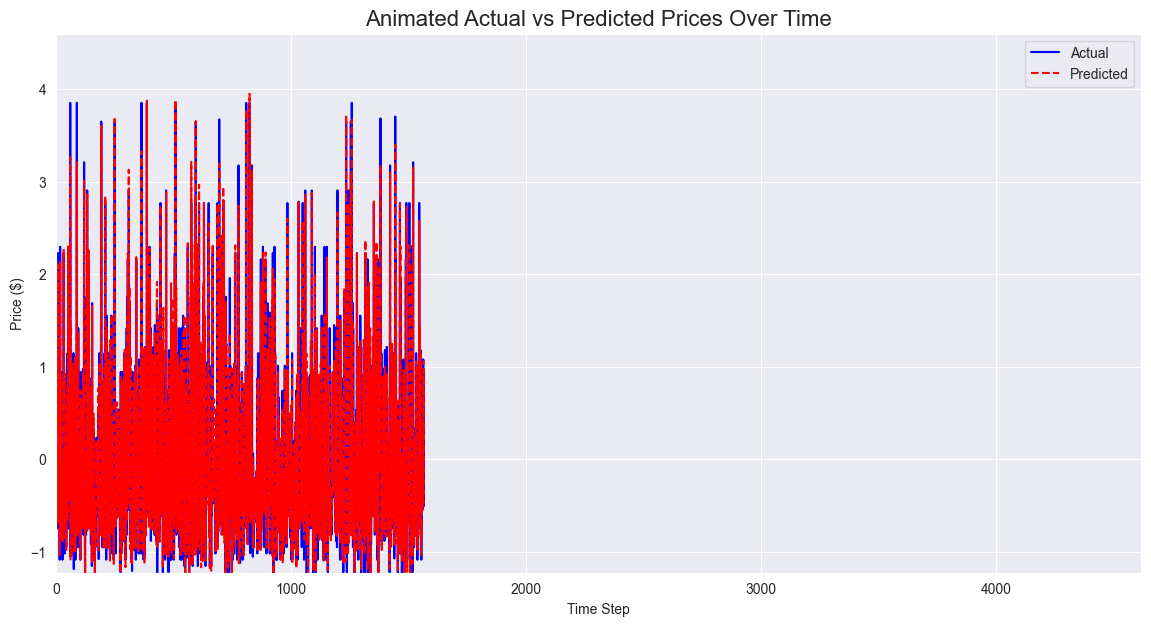

In [59]:
import matplotlib.animation as animation

# Set up the figure
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_xlim(0, len(y_test))
ax.set_ylim(min(y_test.min(), predictions.min()) * 0.9, max(y_test.max(), predictions.max()) * 1.1)
line_actual, = ax.plot([], [], label='Actual', color='blue')
line_pred, = ax.plot([], [], label='Predicted', color='red', linestyle='--')
ax.set_title('Animated Actual vs Predicted Prices Over Time', fontsize=16)
ax.set_xlabel('Time Step')
ax.set_ylabel('Price ($)')
ax.legend()

# Initialization function: plot the background
def init():
    line_actual.set_data([], [])
    line_pred.set_data([], [])
    return line_actual, line_pred

# Animation function: update the lines
def animate(i):
    x = np.arange(0, i)
    line_actual.set_data(x, y_test.values[:i])
    line_pred.set_data(x, predictions[:i])
    return line_actual, line_pred

# Create animation
ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(y_test), interval=100, blit=True
)

# To display animation inside Jupyter Notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

# If you want to save it as a video:
# ani.save('prediction_animation.mp4', writer='ffmpeg')
